In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## 1. Data Preprocessing - Training data & Business data

### Training Data
This is Yelp users' review dataset

In [2]:
training = pd.read_csv('training_data.csv')
training.tail()

,id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,r_business_id,r_stars,r_review_date,u_user_id,u_review_count,u_yelping_since,u_months,u_elite,u_fans,u_average_stars
229379,256303,Zzl4ffV9kFY3yOSSgyRUBQ,Binion's Gambling Hall,128 Fremont St,Las Vegas,NV,89101.0,36.171633,-115.144263,3.5,...,Zzl4ffV9kFY3yOSSgyRUBQ,5.0,2019-10-30 11:31:42,zlErHp1H9BFTbxl3g30U6Q,8,2010-11-30 03:04:50,111,False,0,3.50
229380,256304,Zzl4ffV9kFY3yOSSgyRUBQ,Binion's Gambling Hall,128 Fremont St,Las Vegas,NV,89101.0,36.171633,-115.144263,3.5,...,Zzl4ffV9kFY3yOSSgyRUBQ,5.0,2019-11-09 08:00:35,m4lj1raRiE5NptjcUj61bA,8,2011-07-27 20:21:08,103,False,0,5.00
229381,256305,Zzl4ffV9kFY3yOSSgyRUBQ,Binion's Gambling Hall,128 Fremont St,Las Vegas,NV,89101.0,36.171633,-115.144263,3.5,...,Zzl4ffV9kFY3yOSSgyRUBQ,4.0,2019-11-10 07:12:36,Tur4sqv0MPXHfd2hi_z8UA,55,2019-04-01 20:36:00,9,False,2,3.59
229382,256306,zZn22GJCl6f2fCrnUBQhcA,Rubio's,7300 Aliante Pkwy,North Las Vegas,NV,89084.0,36.293170,-115.179097,3.5,...,zZn22GJCl6f2fCrnUBQhcA,2.0,2019-01-06 18:56:20,oAnpuCJKSjQ1Zf-EnD3bzQ,19,2018-02-21 15:50:00,23,False,0,3.85
229383,256307,zZn22GJCl6f2fCrnUBQhcA,Rubio's,7300 Aliante Pkwy,North Las Vegas,NV,89084.0,36.293170,-115.179097,3.5,...,zZn22GJCl6f2fCrnUBQhcA,5.0,2019-04-09 05:45:29,d4ujcIQQEvRv7yfvc9YMcA,18,2011-09-17 21:10:00,101,False,0,2.68


In [3]:
training.columns

Index(['id', 'business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'category', 'fast_food', 'coffee', 'bar',
       'attributes_CreditCards', 'attributes_Appointment_Only',
       'attributes_PriceRange', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'attributes_wifi', 'attributes_takeout',
       'attributes_noiselevel', 'attributes_reservations',
       'attributes_delivery', 'attributes_outdoorseating',
       'attributes_smoking', 'r_review_id', 'r_user_id', 'r_business_id',
       'r_stars', 'r_review_date', 'u_user_id', 'u_review_count',
       'u_yelping_since', 'u_months', 'u_elite', 'u_fans', 'u_average_stars'],
      dtype='object')

### 1.1 Data Cleaning

#### Remove Duplicate Columns

In [4]:
training.drop('id', axis = 1, inplace = True)
training.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,r_business_id,r_stars,r_review_date,u_user_id,u_review_count,u_yelping_since,u_months,u_elite,u_fans,u_average_stars
0,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,__fMLrmv9M1_W4kBvR2VnQ,2.0,2019-05-13 03:22:04,FVdicZoOzop2tcn4a9mCEw,18,2014-03-08 02:09:41,71,False,0,3.67
1,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,__fMLrmv9M1_W4kBvR2VnQ,4.0,2019-05-16 02:13:46,9GUuNKZinw7JxT2nG3jSmg,407,2018-05-06 22:09:29,20,False,9,4.30
2,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,__fMLrmv9M1_W4kBvR2VnQ,3.0,2019-06-06 01:31:00,CcZX6QGVzIc7EZrPYv43VA,12,2011-04-20 22:00:33,106,False,0,4.33
3,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,__fMLrmv9M1_W4kBvR2VnQ,3.0,2019-09-07 16:22:36,RW0MaqmgRFDUeKdtUm_hLA,76,2017-05-22 01:39:08,32,False,0,3.36
4,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,__fMLrmv9M1_W4kBvR2VnQ,1.0,2019-10-11 01:27:51,PoxQoHQLSYBUt35VYye4eg,9,2016-05-24 21:58:56,44,False,0,2.56


In [5]:
training1 = training.copy()
training1.drop('r_user_id', inplace = True, axis = 1)
training1.drop('r_business_id', inplace = True, axis = 1)
training1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,r_review_id,r_stars,r_review_date,u_user_id,u_review_count,u_yelping_since,u_months,u_elite,u_fans,u_average_stars
0,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,fQSTR08zfZr3zzDfjjqJ7w,2.0,2019-05-13 03:22:04,FVdicZoOzop2tcn4a9mCEw,18,2014-03-08 02:09:41,71,False,0,3.67
1,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,mzIcsvM6wcZp-eZ--7IniA,4.0,2019-05-16 02:13:46,9GUuNKZinw7JxT2nG3jSmg,407,2018-05-06 22:09:29,20,False,9,4.30
2,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,267CQZD9kiZGe5iQN1JNAQ,3.0,2019-06-06 01:31:00,CcZX6QGVzIc7EZrPYv43VA,12,2011-04-20 22:00:33,106,False,0,4.33
3,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,yfTzHcnC_v9-SeAfMf-ehA,3.0,2019-09-07 16:22:36,RW0MaqmgRFDUeKdtUm_hLA,76,2017-05-22 01:39:08,32,False,0,3.36
4,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,31,...,m8sd27vNjXJBgRb6sH5jjA,1.0,2019-10-11 01:27:51,PoxQoHQLSYBUt35VYye4eg,9,2016-05-24 21:58:56,44,False,0,2.56


#### Convert Data
1. Convert boolean values into 1 or 0 -- False is 0 and True is 1
2. Convert Price Range (1, 2 ,3 4) into (0.25, 0.5, 0.75, 1) accordingly
3. Convert Object into Numbers

In [6]:
training1['fast_food'].replace([False, True], [0, 1], inplace = True)
training1['coffee'].replace([False, True], [0, 1], inplace = True)
training1['bar'].replace([False, True], [0, 1], inplace = True)
training1['attributes_CreditCards'].replace([False, True], [0, 1], inplace = True)
training1['attributes_Appointment_Only'].replace([False, True], [0, 1], inplace = True)
training1['attributes_PriceRange'].replace([1, 2, 3, 4], [0.25, 0.5, 0.75, 1], inplace = True)

training1['attributes_wifi'].replace(['No', 'Yes'], [0, 1], inplace = True)
training1['attributes_takeout'].replace([False, True], [0, 1], inplace = True)
training1['attributes_noiselevel'].replace(['quiet', 'average', 'loud', 'very_loud'], [0, 0, 1, 1], inplace = True)
training1['attributes_reservations'].replace([False, True], [0, 1], inplace = True)
training1['attributes_delivery'].replace([False, True], [0, 1], inplace = True)
training1['attributes_outdoorseating'].replace([False, True], [0, 1], inplace = True)
training1['attributes_smoking'].replace(['No', 'Yes'], [0, 1], inplace = True)
training1['u_elite'].replace([False, True], [0, 1], inplace = True)

#### Add New Columns
Create New Columns 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun' based on Working Hours from Monday to Sunday. If the restaurant shows "closed" for that day, it will be asigned as 0. Otherwise, it's 1.

In [7]:
def closed_or_not(x):
    if x == 'closed':
        return 0
    else:
        return 1

In [8]:
training1['mon'] = training1['monday'].apply(closed_or_not)
training1['tue'] = training1['tuesday'].apply(closed_or_not)
training1['wed'] = training1['wednesday'].apply(closed_or_not)
training1['thur'] = training1['thursday'].apply(closed_or_not)
training1['fri'] = training1['friday'].apply(closed_or_not)
training1['sat'] = training1['saturday'].apply(closed_or_not)
training1['sun'] = training1['sunday'].apply(closed_or_not)

##### Min Max Scale 'r_stars' (0 to 5) into (0 to 1)

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
training1['r_stars_scale'] = min_max_scaler.fit_transform(training1[['r_stars']])

In [10]:
training1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229384 entries, 0 to 229383
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   business_id                  229384 non-null  object 
 1   name                         229384 non-null  object 
 2   address                      229029 non-null  object 
 3   city                         229384 non-null  object 
 4   state                        229384 non-null  object 
 5   postal_code                  229374 non-null  float64
 6   latitude                     229384 non-null  float64
 7   longitude                    229384 non-null  float64
 8   stars                        229384 non-null  float64
 9   review_count                 229384 non-null  int64  
 10  is_open                      229384 non-null  int64  
 11  categories                   229384 non-null  object 
 12  category                     229384 non-null  object 
 13 

In [11]:
training1.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'category', 'fast_food', 'coffee', 'bar',
       'attributes_CreditCards', 'attributes_Appointment_Only',
       'attributes_PriceRange', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'attributes_wifi', 'attributes_takeout',
       'attributes_noiselevel', 'attributes_reservations',
       'attributes_delivery', 'attributes_outdoorseating',
       'attributes_smoking', 'r_review_id', 'r_stars', 'r_review_date',
       'u_user_id', 'u_review_count', 'u_yelping_since', 'u_months', 'u_elite',
       'u_fans', 'u_average_stars', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat',
       'sun', 'r_stars_scale'],
      dtype='object')

#### Select Important Features

In [12]:
subset = ['u_user_id', 'business_id', 'fast_food', 'coffee', 'bar', 'attributes_CreditCards', 'attributes_Appointment_Only',
         'attributes_PriceRange', 'attributes_wifi', 'attributes_takeout', 
         'attributes_noiselevel', 'attributes_reservations', 
         'attributes_delivery', 'attributes_outdoorseating', 
         'attributes_smoking', 'u_elite', 'r_stars_scale',
         'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
training1_subset = training1.loc[:, subset]
training1_subset.head()

,u_user_id,business_id,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,attributes_takeout,...,attributes_smoking,u_elite,r_stars_scale,mon,tue,wed,thur,fri,sat,sun
0,FVdicZoOzop2tcn4a9mCEw,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0.25,1,1,1,1,1,1,1
1,9GUuNKZinw7JxT2nG3jSmg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0.75,1,1,1,1,1,1,1
2,CcZX6QGVzIc7EZrPYv43VA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0.50,1,1,1,1,1,1,1
3,RW0MaqmgRFDUeKdtUm_hLA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0.50,1,1,1,1,1,1,1
4,PoxQoHQLSYBUt35VYye4eg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0.00,1,1,1,1,1,1,1


In [13]:
training1_subset = training1_subset.reset_index()
training1_subset.head()

,index,u_user_id,business_id,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,...,attributes_smoking,u_elite,r_stars_scale,mon,tue,wed,thur,fri,sat,sun
0,0,FVdicZoOzop2tcn4a9mCEw,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,...,0,0,0.25,1,1,1,1,1,1,1
1,1,9GUuNKZinw7JxT2nG3jSmg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,...,0,0,0.75,1,1,1,1,1,1,1
2,2,CcZX6QGVzIc7EZrPYv43VA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,...,0,0,0.50,1,1,1,1,1,1,1
3,3,RW0MaqmgRFDUeKdtUm_hLA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,...,0,0,0.50,1,1,1,1,1,1,1
4,4,PoxQoHQLSYBUt35VYye4eg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,...,0,0,0.00,1,1,1,1,1,1,1


### 1.2 Count Vectorize 

In [14]:
training1_categories = training.loc[:, ['name', 'categories']]
training1_categories = training1_categories.copy()
training1_categories.head()

,name,categories
0,Dairy Queen,Food/ Burgers/ Ice Cream & Frozen Yogurt/ Rest...
1,Dairy Queen,Food/ Burgers/ Ice Cream & Frozen Yogurt/ Rest...
2,Dairy Queen,Food/ Burgers/ Ice Cream & Frozen Yogurt/ Rest...
3,Dairy Queen,Food/ Burgers/ Ice Cream & Frozen Yogurt/ Rest...
4,Dairy Queen,Food/ Burgers/ Ice Cream & Frozen Yogurt/ Rest...


In [15]:
import re
training1_categories['categories'] = training1_categories['categories'].apply(lambda x: x.replace(' ', ''))
training1_categories['categories'] = training1_categories['categories'].apply(lambda x: x.replace('/', ' '))
training1_categories['categories'] = training1_categories['categories'].apply(lambda x: x.lower())
training1_categories['categories'] = training1_categories['categories'].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x))

#### Apply Countvectorizer( ) on 'category' feature

In [16]:
count1 = CountVectorizer()
count_matrix1 = count1.fit_transform(training1_categories['categories'])
count_matrix1 = pd.DataFrame(count_matrix1.toarray(), columns = count1.get_feature_names())
count_matrix1['index'] = training1_subset['index']
count_matrix1.head()

,acaibowls,accessories,activelife,acupuncture,adultentertainment,afghan,african,aircraftrepairs,airductcleaning,airports,...,windshieldinstallationrepair,winebars,wineries,winespirits,womensclothing,wraps,yelpevents,yoga,zoos,index
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


#### Join training1_subset and count_matrix1 tables based on 'index'

In [17]:
training_cat_count = pd.merge(training1_subset, count_matrix1, how = 'inner', on = 'index')
training_cat_count.drop('index', axis = 1, inplace = True)
training_cat_count.head()

,u_user_id,business_id,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,attributes_takeout,...,windowsinstallation,windshieldinstallationrepair,winebars,wineries,winespirits,womensclothing,wraps,yelpevents,yoga,zoos
0,FVdicZoOzop2tcn4a9mCEw,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9GUuNKZinw7JxT2nG3jSmg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0,0,0,0,0,0,0,0
2,CcZX6QGVzIc7EZrPYv43VA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0,0,0,0,0,0,0,0
3,RW0MaqmgRFDUeKdtUm_hLA,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0,0,0,0,0,0,0,0
4,PoxQoHQLSYBUt35VYye4eg,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,0,0,0,0,0,0,0,0,0


### Business Data
This is Restaurants' information dataset

Apply same operation as we do for Training Data.
For the "elite" column in Business Data, as we assume all restaurants would prefer elite Yelp users (those who are more actively using Yelp) than regular users, we assign 1 for this column. 

In [18]:
business = pd.read_csv('business_change.csv')
business.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes_delivery,attributes_outdoorseating,attributes_smoking,mon,tue,wed,thur,fri,sat,sun
0,0,__fMLrmv9M1_W4kBvR2VnQ,Dairy Queen,1212 Nevada Hwy,Boulder City,NV,89005.0,35.972072,-114.849926,3.5,...,0,1,0,1,1,1,1,1,1,1
1,1,_-3aZXuecjOSjramI1IBkA,Fountain Grille Restaurant,3600 Paradise Rd,Las Vegas,NV,89169.0,36.124075,-115.153667,4.0,...,0,0,0,1,1,1,1,1,1,1
2,2,_-o4WsGS2yhFneiuMTNdSA,Monti's Smokehouse BBQ,6320 E Charleston Blvd,Las Vegas,NV,89142.0,36.159752,-115.034639,4.5,...,1,0,0,1,1,1,1,1,1,1
3,3,_-QrdVYJbebaC2qschZ6iQ,Little Caesars Pizza,4559 W Charleston Blvd,Las Vegas,NV,89102.0,36.158452,-115.202623,2.0,...,1,0,0,1,1,1,1,1,1,1
4,4,_0x7W6fizaPP76xNBxBLAQ,Stephano's Greek & Mediterranean Grill,6115 S Fort Apache Rd,Las Vegas,NV,89148.0,36.077165,-115.298621,4.0,...,1,1,0,1,1,1,1,1,1,1


In [19]:
business.drop(business.columns[0], axis=1, inplace = True)
# set u_elite feature as 1
business['u_elite'] = 1
# change type of postal_code to int
business.postal_code = business.postal_code.fillna(0)
business.postal_code = business.postal_code.astype(int)
# scale stars feature
business['stars_scale'] = min_max_scaler.fit_transform(business[['stars']])

In [20]:
print(len(set(training1_subset['business_id'])) == len(set(business['business_id'])))
a = list(set(training1_subset['business_id']))
business = business[business['business_id'].isin(a)]
print(business.shape)
print(len(set(training1_subset['business_id'])) == len(set(business['business_id'])))
print(business['business_id'].isin(a).sum())
print(business.columns)

False
(4955, 42)
True
4955
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'category', 'fast_food', 'coffee', 'bar',
       'attributes_CreditCards', 'attributes_Appointment_Only',
       'attributes_PriceRange', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday', 'saturday', 'sunday', 'attributes_wifi', 'attributes_takeout',
       'attributes_noiselevel', 'attributes_reservations',
       'attributes_delivery', 'attributes_outdoorseating',
       'attributes_smoking', 'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun',
       'u_elite', 'stars_scale'],
      dtype='object')


In [21]:
subset1 = ['business_id', 'fast_food', 'coffee', 'bar', 'attributes_CreditCards', 'attributes_Appointment_Only',
         'attributes_PriceRange', 'attributes_wifi', 'attributes_takeout', 
         'attributes_noiselevel', 'attributes_reservations', 
         'attributes_delivery', 'attributes_outdoorseating', 
         'attributes_smoking', 'u_elite', 'stars_scale',
         'mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
business_subset = business.loc[:, subset1]
business_subset = business_subset.reset_index(drop = True)
business_subset = business_subset.reset_index()
business_subset.head()

,index,business_id,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,attributes_takeout,...,attributes_smoking,u_elite,stars_scale,mon,tue,wed,thur,fri,sat,sun
0,0,__fMLrmv9M1_W4kBvR2VnQ,1,0,0,1,0,0.25,0,1,...,0,1,0.625,1,1,1,1,1,1,1
1,1,_-o4WsGS2yhFneiuMTNdSA,0,0,1,1,0,0.50,1,1,...,0,1,0.875,1,1,1,1,1,1,1
2,2,_-QrdVYJbebaC2qschZ6iQ,1,0,0,1,0,0.25,0,1,...,0,1,0.250,1,1,1,1,1,1,1
3,3,_0x7W6fizaPP76xNBxBLAQ,0,0,0,1,0,0.50,1,1,...,0,1,0.750,1,1,1,1,1,1,1
4,4,_0ZIFTvfcA3UETO_S_JTNA,1,1,0,1,0,0.25,1,1,...,0,1,0.250,1,1,1,1,1,1,1


In [22]:
business['categories'] = business['categories'].apply(lambda x: x.replace(' ', ''))
business['categories'] = business['categories'].apply(lambda x: x.replace('/', ' '))
business['categories'] = business['categories'].apply(lambda x: x.lower())
business['categories'] = business['categories'].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]', '', x))

In [23]:
count2 = CountVectorizer()
count_matrix2 = count2.fit_transform(business['categories'])
count_matrix2 = pd.DataFrame(count_matrix2.toarray(), columns = count2.get_feature_names())
count_matrix2.head()

,acaibowls,accessories,activelife,acupuncture,adultentertainment,afghan,african,aircraftrepairs,airductcleaning,airports,...,windowsinstallation,windshieldinstallationrepair,winebars,wineries,winespirits,womensclothing,wraps,yelpevents,yoga,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# check consistency
print(count_matrix1.columns)
print(count_matrix2.columns)

Index(['acaibowls', 'accessories', 'activelife', 'acupuncture',
       'adultentertainment', 'afghan', 'african', 'aircraftrepairs',
       'airductcleaning', 'airports',
       ...
       'windshieldinstallationrepair', 'winebars', 'wineries', 'winespirits',
       'womensclothing', 'wraps', 'yelpevents', 'yoga', 'zoos', 'index'],
      dtype='object', length=496)
Index(['acaibowls', 'accessories', 'activelife', 'acupuncture',
       'adultentertainment', 'afghan', 'african', 'aircraftrepairs',
       'airductcleaning', 'airports',
       ...
       'windowsinstallation', 'windshieldinstallationrepair', 'winebars',
       'wineries', 'winespirits', 'womensclothing', 'wraps', 'yelpevents',
       'yoga', 'zoos'],
      dtype='object', length=495)


In [25]:
(count_matrix1.columns[0:-1] == count_matrix2.columns).sum()

495

In [26]:
count_matrix2['index'] = business_subset['index']
business_cat_count = pd.merge(business_subset, count_matrix2, how = 'inner', on = 'index')
business_cat_count.drop(business_cat_count.columns[0], axis=1, inplace = True)
business_cat_count = business_cat_count.iloc[:, 1:]
business_cat_count.head()

,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,attributes_takeout,attributes_noiselevel,attributes_reservations,...,windowsinstallation,windshieldinstallationrepair,winebars,wineries,winespirits,womensclothing,wraps,yelpevents,yoga,zoos
0,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0.50,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0.50,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0.25,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dictionary

We would like to store the mapping relation between [user_index to user_id] & [business_index to business_id] & [business_id to business_name] & [business_index to business_id] to three dictionaries, so that we can look up particular user or business information later on.

In [27]:
# dictionary of user index and user_id
user_index_id = dict(zip(training_cat_count.index, training_cat_count.u_user_id))

In [28]:
# dictionary of index and restaurants' id
bus_index_id = dict(zip(business_subset.index, business_subset.business_id))

In [29]:
# dictionary of restuarnts' id and restaurants' names
bus_id_names = dict(zip(business.business_id, business.name))

In [30]:
# dictionary of restuarnts' id and restaurants' address
business_id_address = business[["business_id", "address", "city", "state"]].astype(str)
# combine multiple columns into a combined address
business_id_address['combined_address'] = business_id_address[["address", "city", "state"]].apply(lambda x: ', '.join(x), axis=1)
bus_id_address = dict(zip(business_id_address.business_id, business_id_address.combined_address))

## 2. Data Modeling - Clustering

In [31]:
x1 = training_cat_count.iloc[:, 2:]
x1_value = x1.values
x1.head()

,fast_food,coffee,bar,attributes_CreditCards,attributes_Appointment_Only,attributes_PriceRange,attributes_wifi,attributes_takeout,attributes_noiselevel,attributes_reservations,...,windowsinstallation,windshieldinstallationrepair,winebars,wineries,winespirits,womensclothing,wraps,yelpevents,yoga,zoos
0,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.1 Plot the Elbow Method

In [32]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

def plot_inertia(array, start, end):
    inertia = []
    x_axis = range(start, end+1, 10)
    for i in range(start, end+1):
        if not i%10:
            kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
            kmeans.fit(array)
            inertia.append(kmeans.inertia_)

    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)   

    return ax

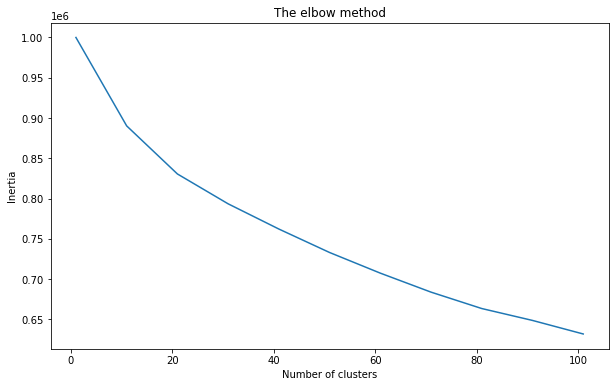

In [33]:
# this step may take lots of time to run it; 
plot_inertia(x1_value, 1, 110)

#### 2.2 Fit Data and Predict

In [35]:
model = KMeans(n_clusters= 60, random_state=0)
clusters = model.fit_predict(x1)
clusters

array([22, 22, 22, ..., 39, 15, 15], dtype=int32)

#### 2.3 Bar chart for user groups' distribution

In [36]:
clusters = pd.DataFrame(clusters)
clusters_value_counts = clusters[0].value_counts().to_frame()
clusters_value_counts = clusters_value_counts.reset_index()
clusters_value_counts.columns = ['group', 'count']
clusters_value_counts.head()

,group,count
0,26,8551
1,6,7644
2,44,7434
3,55,7408
4,23,7308


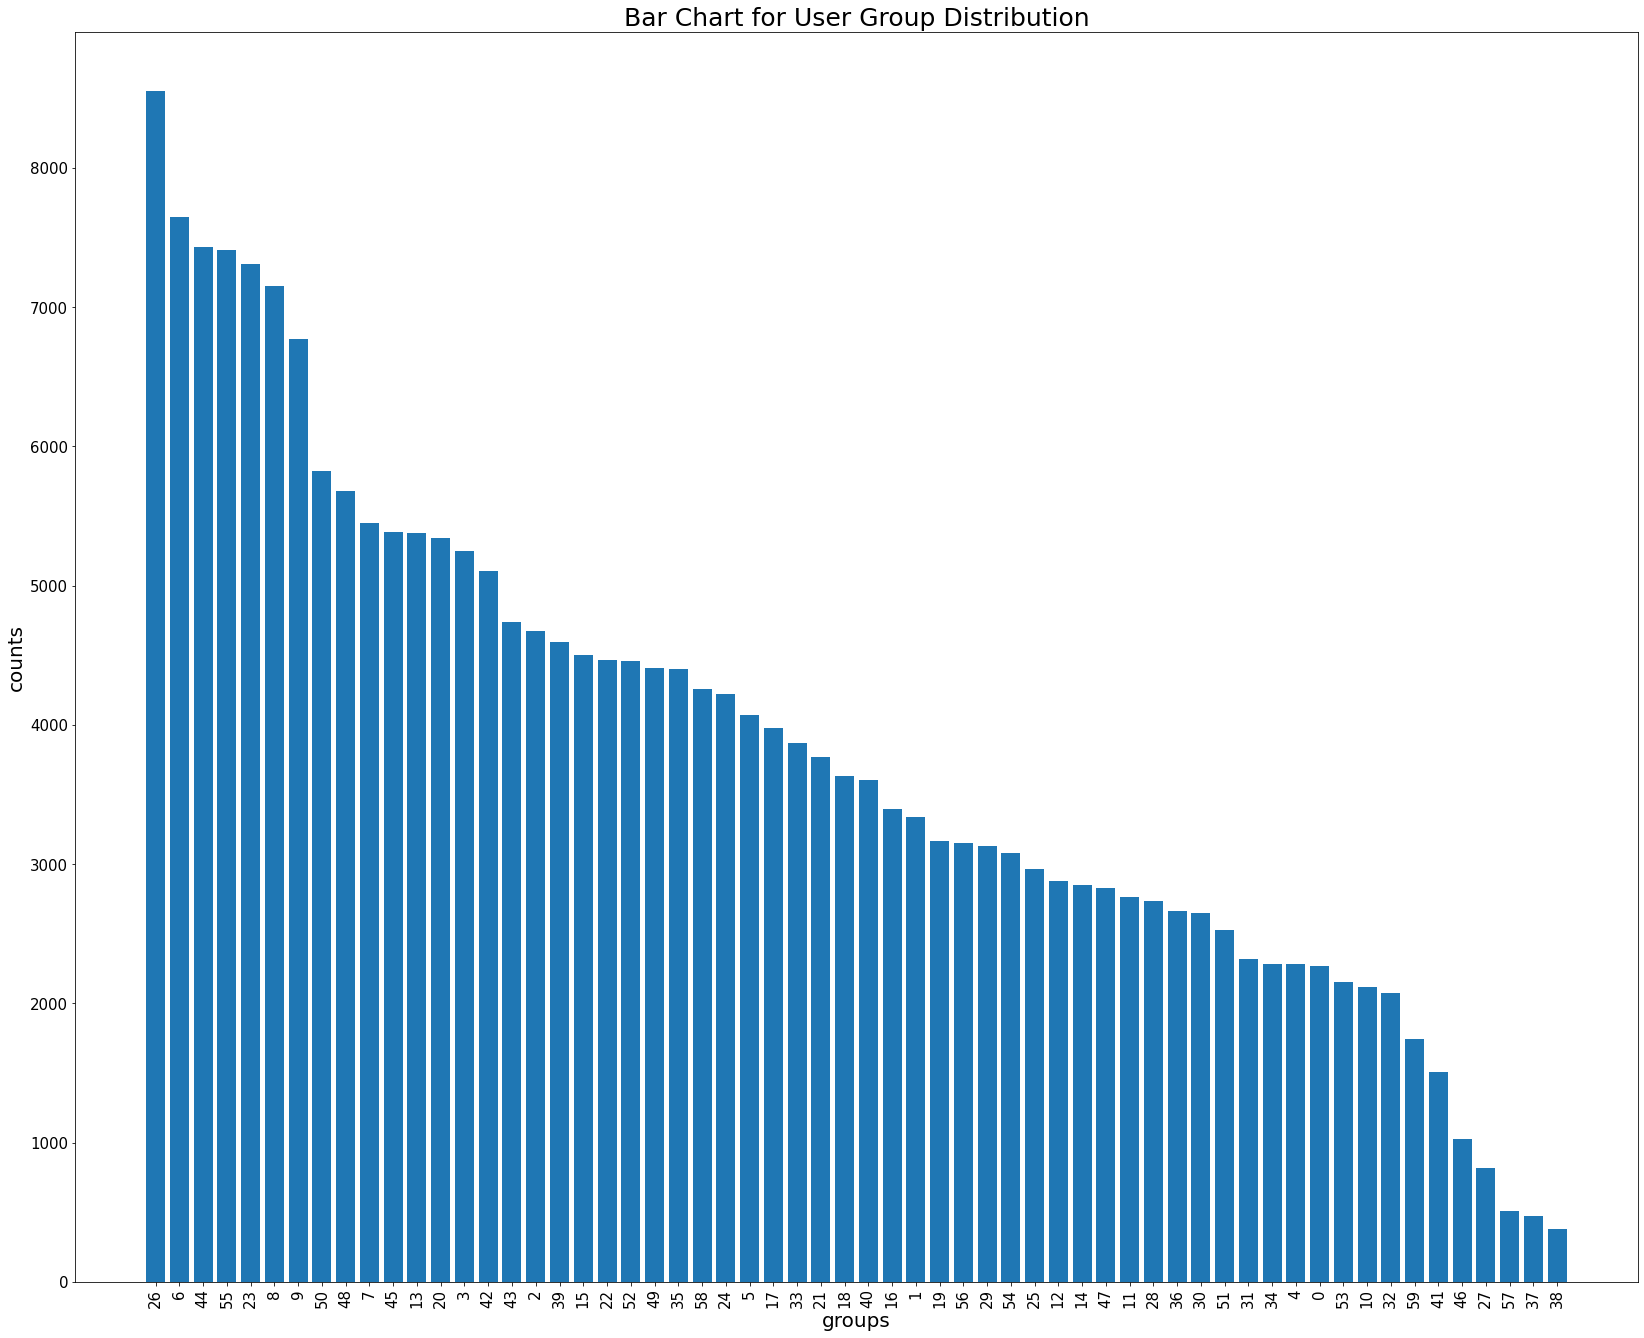

In [37]:
plt.figure(figsize = (28, 23))
plt.bar(range(clusters_value_counts.shape[0]), clusters_value_counts['count'])
plt.xticks(range(clusters_value_counts.shape[0]), clusters_value_counts['group'], rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('groups', fontsize = 20)
plt.ylabel('counts', fontsize = 20)
plt.title('Bar Chart for User Group Distribution', fontsize = 25)
plt.show()

#### Select K=60
Based on the plot graph, we try to check each group users distribution using k = 10, 20, 60, 70 and 80. When K=60, it has a better and more reasonable distirbution of each group's counts of users.

#### 2.4 Centroids

In [38]:
model.cluster_centers_

array([[-5.27355937e-16, -4.71844785e-16,  1.58149780e-01, ...,
         6.09863722e-20,  5.42101086e-19,  1.08420217e-19],
       [ 5.09439616e-03,  1.00000000e+00, -5.55111512e-17, ...,
         7.45388994e-20, -2.16840434e-19,  1.62630326e-19],
       [-8.60422844e-16,  8.77568493e-03,  4.28082192e-04, ...,
         5.42101086e-20,  3.30681663e-18,  2.92734587e-18],
       ...,
       [-6.66133815e-16, -1.04083409e-15,  1.00000000e+00, ...,
         9.14795583e-20, -7.04731412e-19,  5.96311195e-19],
       [-7.77156117e-16,  6.11045828e-03,  2.53819036e-02, ...,
         1.16890547e-19,  2.33103467e-18,  2.05998413e-18],
       [-5.41233725e-16,  1.00000000e+00,  8.65329513e-02, ...,
         7.96210970e-20,  5.96311195e-19,  7.04731412e-19]])

In [39]:
model.cluster_centers_.shape

(60, 517)

## 3. Cosine Similarity
Here, we calculate the similarity between each user group and all restaurants.

In [40]:
centroids = pd.DataFrame(model.cluster_centers_)
cosine_sim = cosine_similarity(centroids, business_cat_count)
print("The shape for this similarity matrix is {0}".format(cosine_sim.shape))
cosine_sim1 = pd.DataFrame(cosine_sim)
cosine_sim1.head()

The shape for this similarity matrix is (60, 4955)


,0,1,2,3,4,5,6,7,8,9,...,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954
0,0.776561,0.679442,0.729450,0.799990,0.738827,0.733763,0.815259,0.773777,0.685616,0.802569,...,0.754266,0.758496,0.751261,0.709243,0.779381,0.690379,0.721329,0.848684,0.556313,0.659544
1,0.680714,0.644409,0.702210,0.735634,0.796843,0.684462,0.755575,0.682456,0.596528,0.924546,...,0.737268,0.840488,0.722900,0.639039,0.762526,0.792822,0.791018,0.780574,0.508696,0.605613
2,0.717873,0.673616,0.773897,0.775409,0.780420,0.800689,0.776835,0.769582,0.663232,0.789091,...,0.763452,0.761894,0.752405,0.816938,0.759046,0.676206,0.750495,0.824879,0.598564,0.713518
3,0.630036,0.705420,0.654306,0.702415,0.631458,0.715778,0.703583,0.679424,0.801667,0.670757,...,0.697119,0.643836,0.705564,0.660862,0.640177,0.577830,0.613545,0.747717,0.741131,0.596402
4,0.656493,0.629425,0.713450,0.750179,0.719977,0.705465,0.749988,0.716953,0.647432,0.851489,...,0.694235,0.752726,0.777905,0.704531,0.700144,0.725854,0.712963,0.795761,0.555732,0.634672


## 4.  Recommend Targeting Users to Corresponding Restaurant

#### Business Application
In order to attract more traffic, any restaurant can pay for Yelp to do marketing campaign. Then, Yelp can help to recommend certain numbers of targeting users to corresponding restaurant, such as sending users notification.

#### Input Data

Input1 - Number of most qualified users that resturant would like to have;

Input2 - Restaurant's Name

#### Output Result
The output is the name list of requested number of Yelp users to that restaurant

In [41]:
# input: restaurant name; output: dataframe with features of "business_index" & "business_id" & restaurant address 
def get_res_table(res_name):
    id_arr = []
    index_arr = []
    for key, value in bus_id_names.items():
        if value == res_name:
            id_arr.append(key)
    if len(id_arr) == 0:
        print("There is no such restaurant!!!")
        return
    res_table = business[business.business_id.isin(id_arr)]
    res_table = res_table[["business_id", "address", "city", "state", "postal_code"]]
    for bus_index, bus_id in bus_index_id.items():
        if bus_id in id_arr:
            index_arr.append(bus_index)  
    res_table.insert(loc=0, column="business_index", value=index_arr)
    res_table = res_table.reset_index(drop=True)
    return res_table

In [42]:
get_res_table("El Pollo Loco")

,business_index,business_id,address,city,state,postal_code
0,7,_2Wbpm821bdNsh-gyqufrg,6131 W Lake Mead Blvd,Las Vegas,NV,89108
1,35,_paJE9yQfSvo25BKBQrKZA,440 E Silverado Ranch Blvd,Las Vegas,NV,89123
2,152,06MlxbtB4ZYeg_ri02RIAQ,2401 S Decatur Blvd,Las Vegas,NV,89102
3,438,41WfL6MGTAXYgRQfNT3dyA,7205 S Eastern Ave,Las Vegas,NV,89119
4,926,A4yJu-Nq1n6nuLP6QKZkrw,7380 W Cheyenne Ave,Las Vegas,NV,89129
5,1029,AVA3AwMEHfLY9anV3WgDXA,5688 S Rainbow Blvd,Las Vegas,NV,89118
6,1486,DugcfgyM4DhDldK_jsF0Xw,10585 S Eastern Ave,Henderson,NV,89052
7,1632,ePVVYZlBCOyPqK_XYnfJWg,1985 N Martin Luther King Blvd,Las Vegas,NV,89106
8,1878,gbsDvIBVQtVTpzUUzlE3GA,185 N Stephanie St,Henderson,NV,89074
9,2050,HewQZ7hyegytoABzApyUiA,4292 Blue Diamond Rd,Las Vegas,NV,89139


In [43]:
def recommend_users(top_n, input_res_index):
    # construct the dict with mapping user_index: similarity between input restaurant 
    counter = 0
    user_id_list = []
    r_u_sim_dic = {}
    # get the group index with the highest similarity with the input restaurant 
    group_index = cosine_sim1[input_res_index].idxmax()
    # the user group corresponding to the index 
    group_df = x1[model.labels_ == group_index]
    # iterate the row in group and store them into the dic in case that the original index of users would be changed
    for i in range(len(group_df)):
        r_u_similarity = cosine_similarity(group_df.iloc[[i]], business_cat_count.iloc[[input_res_index]])
        ind = group_df.iloc[[i]].index.item()
        r_u_sim_dic[ind] = r_u_similarity[0][0]
    sorted_list = sorted(r_u_sim_dic, key=r_u_sim_dic.get, reverse = True)
    for user_id in sorted_list:
        if counter < top_n:
            if user_id not in user_id_list:
                user_id_list.append(user_index_id[user_id])
                counter += 1         
        else:
            break
    res_address = bus_id_address[bus_index_id[input_res_index]]
    print("For Restaurant {0}, located in {1}, here is the name list of top {2} most qualified Yelp users, which are in Group {3}:"
         .format(bus_id_names[bus_index_id[input_res_index]],res_address, top_n, group_index))
    print(user_id_list)


In [44]:
recommend_users(20, 7)

For Restaurant El Pollo Loco, located in 6131 W Lake Mead Blvd, Las Vegas, NV, here is the name list of top 20 most qualified Yelp users, which are in Group 22:
['HJj82f-csBI7jjgenwqhvw', '_ZMD-Abvm-DHCmsOF-f8FA', 'GBco3mVxeCDix8FHNBW85w', 'WYSf63EuLpUbSqco5BsSKQ', 'VzdF-Eqnp3FpKb8cYWeTSw', '6csBQly-kNUsMgtDjgtItg', 'i9c0c9nDA6jDWiBONX_H7Q', 'WHb14ILTaJ0_KBE59vSXUA', 'S8u8HDbrZvKn6TyxwzJnHA', 'QkxOKEhRLBj67XqkVKTAeQ', 'iqX8l15udvxYj3sbJLF_Vw', 'mF9cdDIMhHoYe4g-OmjTlg', 'LXaD6Suvh5hOkMyiDlM3zg', 'aKKEPXi6XP69D_lf_e0iiw', 'dE3Gy-dbUofGh_25MkAdDQ', 'f5Wj7qcQCX_mSdKnRQTD_A', 'AJ2FoHslsbP3PDdYm8XcGw', 'HVnzBxYtHDnx7TE13fE2uA', '8gKghmlYNPxPyjh64Ectlg', 'HjVwzhQWoGv0tOSh0tWvWg']


#### Export Data 

In [45]:
clusters_value_counts.to_csv('user_group_distribution.csv')